## Alucar - Analisando Vendas

In [72]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [73]:
alucar = pd.read_csv('alucar.csv')
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [74]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [75]:

alucar["mes"]= pd.to_datetime(alucar["mes"])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

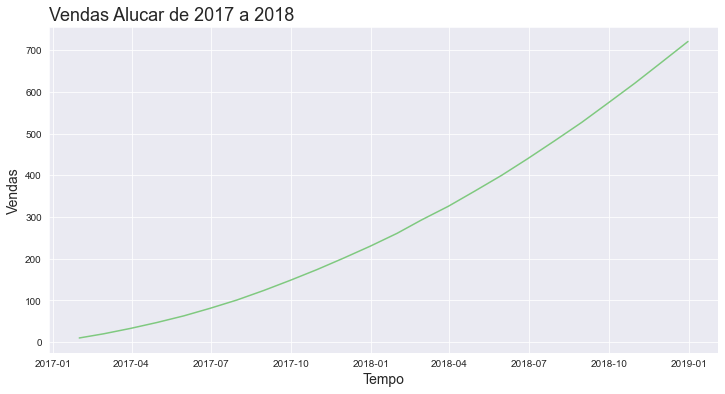

In [76]:

sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title("Vendas Alucar de 2017 a 2018", loc='left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas', fontsize=14)
ax = ax


In [77]:
alucar['aumento']=alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


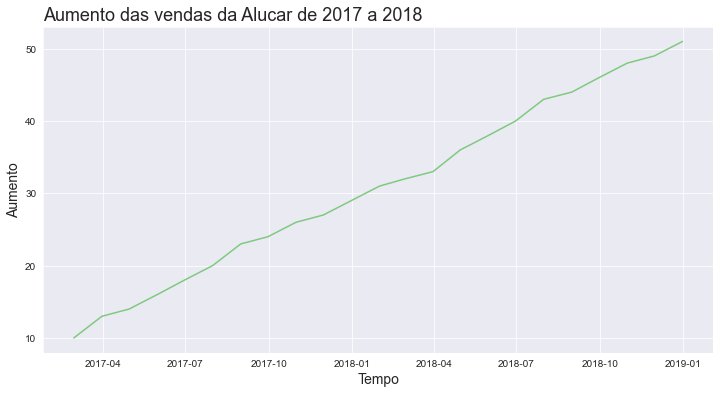

In [78]:

sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title("Aumento das vendas da Alucar de 2017 a 2018", loc='left', fontsize = 18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

In [79]:
def plotar(titulo,labelx, labely, x,y,dataset): 
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize = 18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

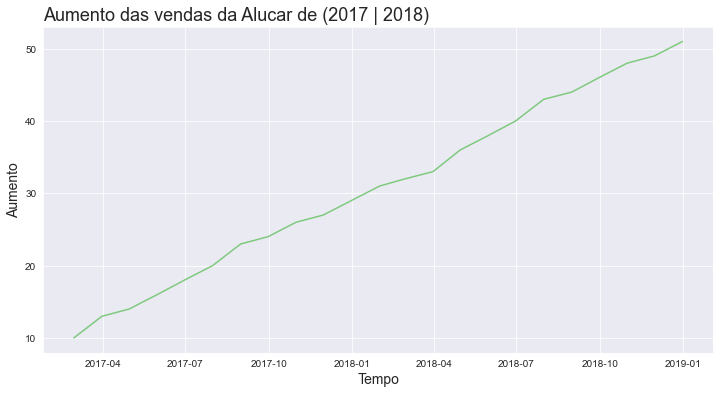

In [80]:
plotar('Aumento das vendas da Alucar de (2017 | 2018)', 'Tempo','Aumento', 'mes', 'aumento', alucar)

In [81]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


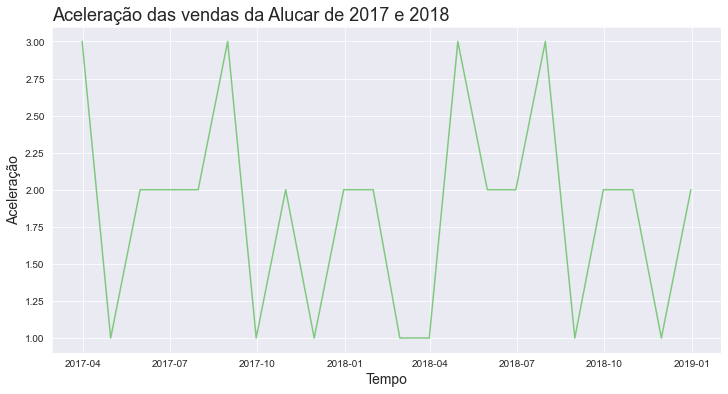

In [82]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018','Tempo','Aceleração', 'mes','aceleracao', alucar)

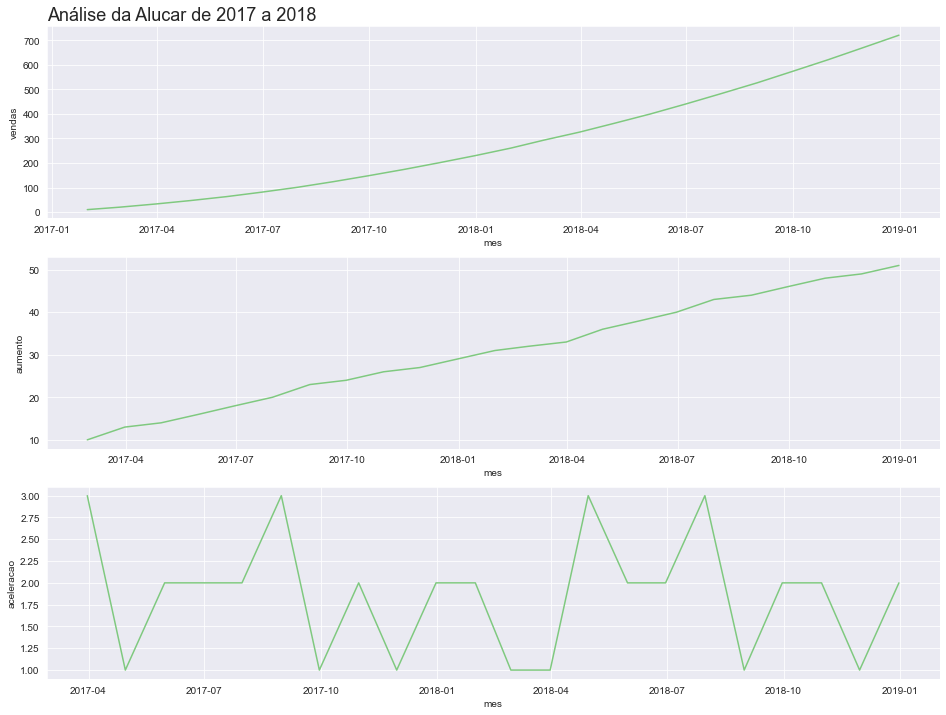

In [83]:
plt.figure(figsize=(16,12))
ax=plt.subplot(3,1,1)
ax.set_title('Análise da Alucar de 2017 a 2018', fontsize = 18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
ax=plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
ax=plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax=ax


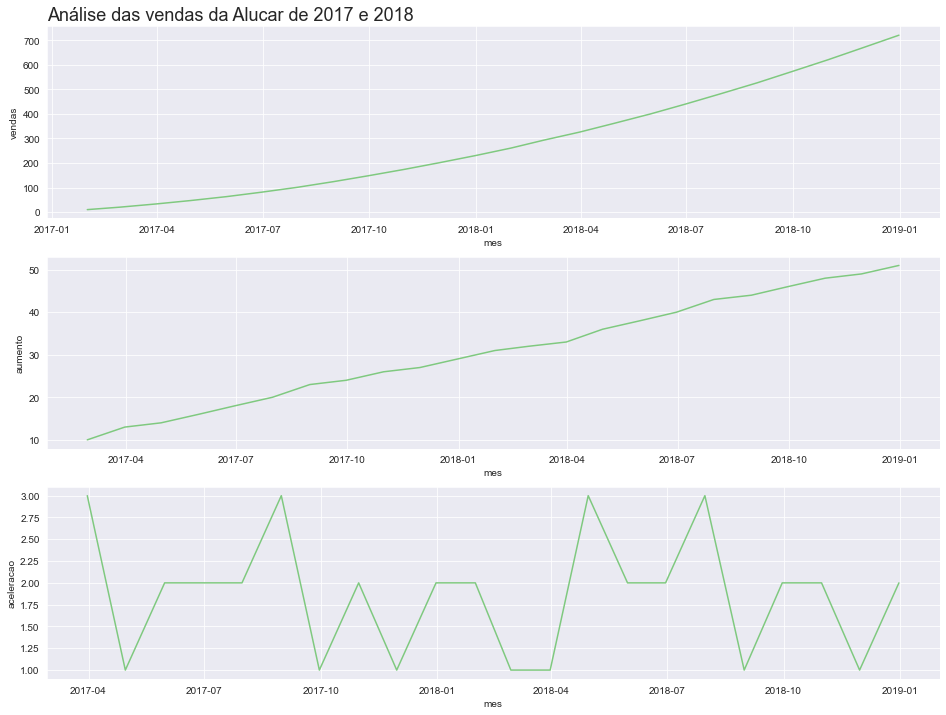

In [84]:
def plot_comparação(x,y1,y2,y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax=plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize = 18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    ax=plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    ax=plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax=ax

plot_comparação('mes','vendas','aumento','aceleracao', alucar, 'Análise das vendas da Alucar de 2017 e 2018')

In [85]:
from pandas.plotting import autocorrelation_plot


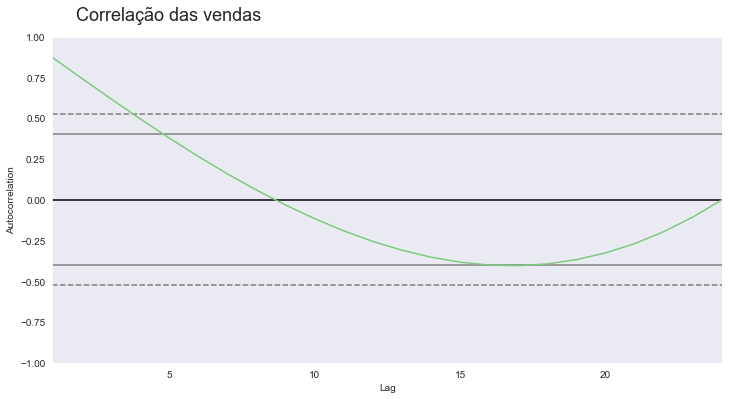

In [86]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize = 18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

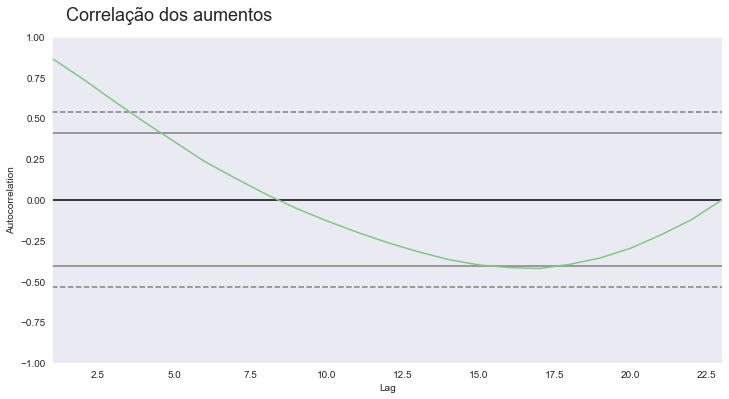

In [87]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação dos aumentos', fontsize = 18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

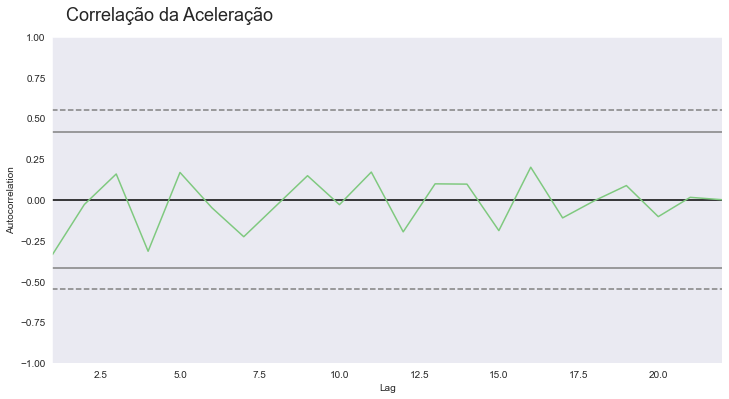

In [88]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da Aceleração', fontsize = 18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

# Alucar - Analisando assinantes da newslatter

In [89]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [90]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [91]:
print("Quantidade de linhas e colunas: {}".format(assinantes.shape))
print("Quantidade de dados nulos:", assinantes.isna().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: mes           0
assinantes    0
dtype: int64


In [92]:
assinantes["aumento"]=assinantes["assinantes"].diff()
assinantes["aceleracao"]=assinantes["aumento"].diff()


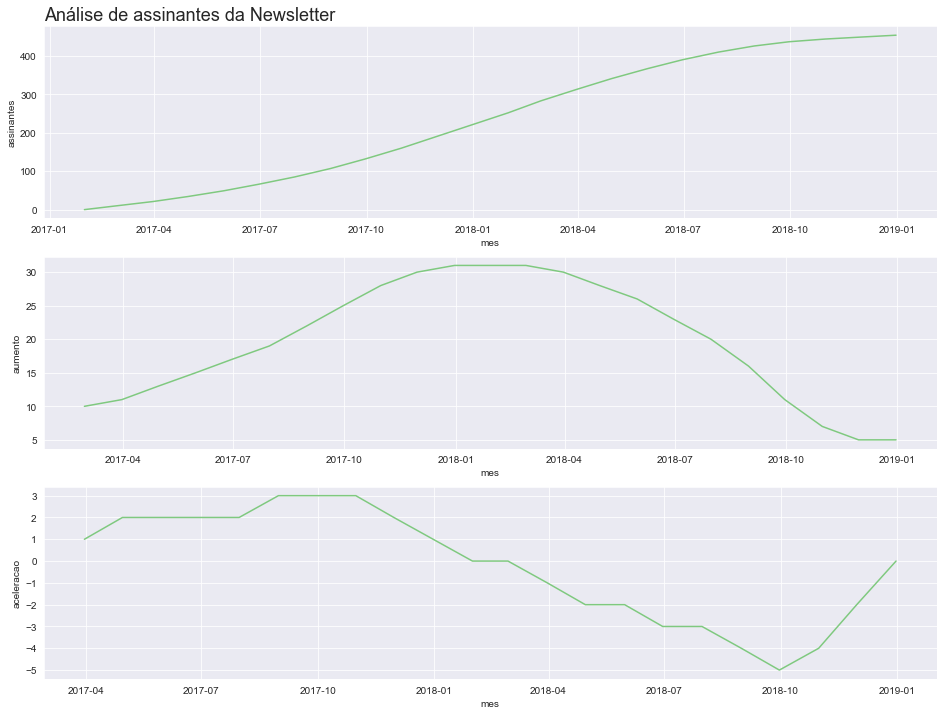

In [93]:
plot_comparação('mes','assinantes','aumento','aceleracao', assinantes, 'Análise de assinantes da Newsletter')

# Análise das vendas da Chocolura

In [94]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [95]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [96]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [97]:
print("Quantidade de linhas e colunas: {}".format(chocolura.shape))
print("Quantidade de dados nulos:", chocolura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [98]:
chocolura['aumento']=chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()

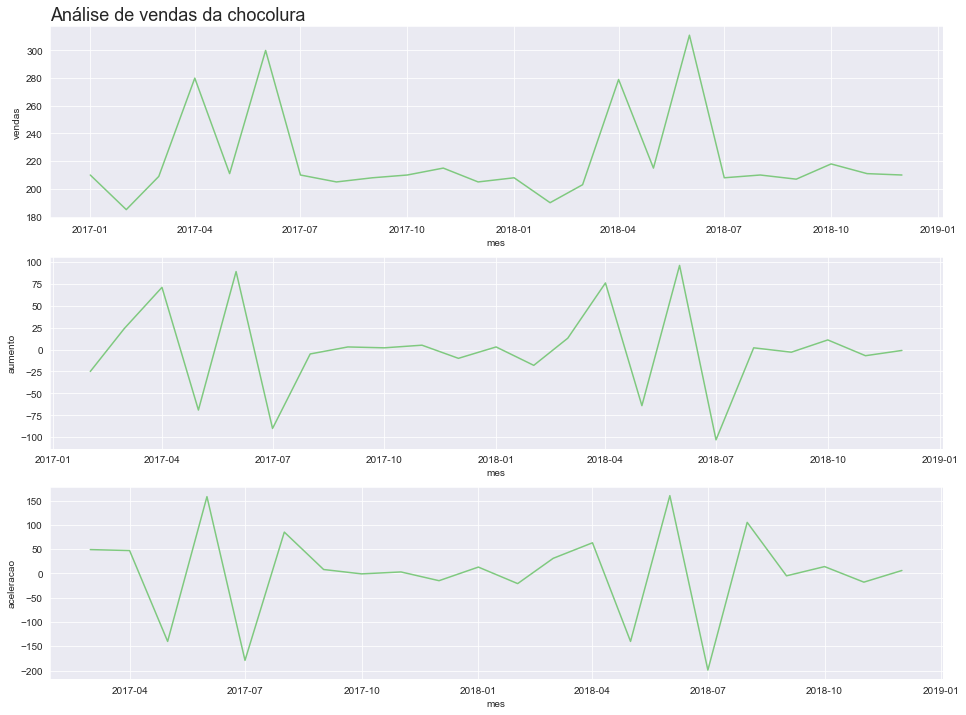

In [99]:
plot_comparação('mes','vendas','aumento','aceleracao', chocolura, 'Análise de vendas da chocolura')

# Chocolura vendas diárias (Outubro e Novembro)

In [100]:
vendas_por_dia= pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [101]:
print("Quantidade de linhas e colunas: {}".format(vendas_por_dia.shape))
print("Quantidade de dados nulos:", vendas_por_dia.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [102]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [103]:
vendas_por_dia['dia']=pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes


dia       datetime64[ns]
vendas             int64
dtype: object

In [104]:
vendas_por_dia['aumento']=vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao']=vendas_por_dia['aumento'].diff()
vendas_por_dia.head(5)

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


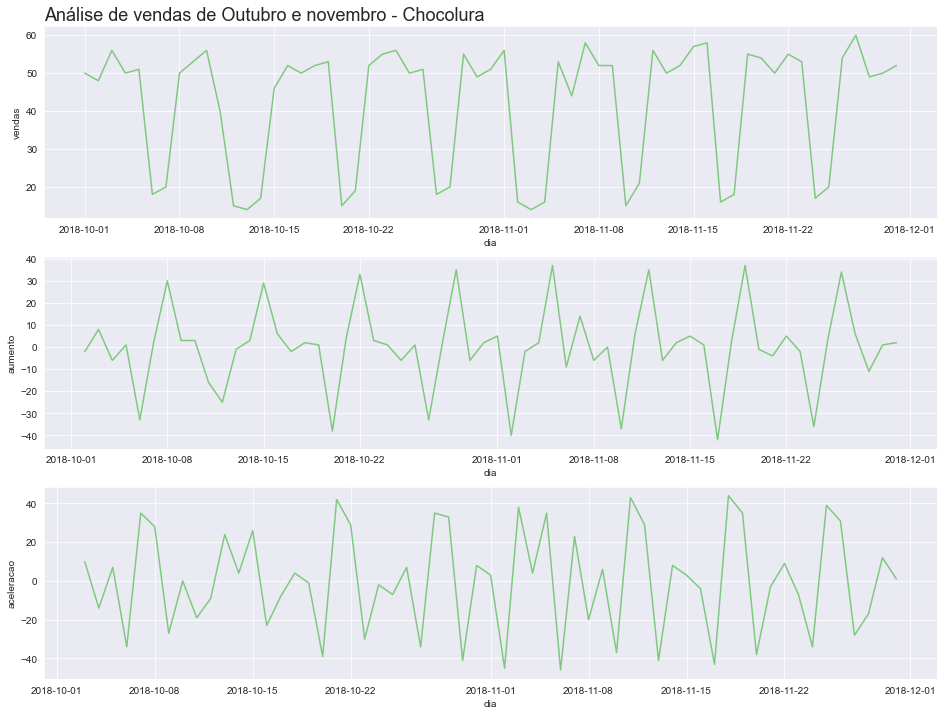

In [105]:
plot_comparação('dia','vendas','aumento','aceleracao', vendas_por_dia, 'Análise de vendas de Outubro e novembro - Chocolura')

## Analisando a sazonalidade

In [106]:
vendas_por_dia['dia_da_semana']=vendas_por_dia['dia'].dt.day_name()
vendas_por_dia

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
...,...,...,...,...,...
56,2018-11-26,54,34.0,31.0,Monday
57,2018-11-27,60,6.0,-28.0,Tuesday
58,2018-11-28,49,-11.0,-17.0,Wednesday
59,2018-11-29,50,1.0,12.0,Thursday


In [107]:
vendas_por_dia.dia_da_semana.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [108]:
dias_traduzidos = {'Monday':'Segunda','Tuesday':'Terça', 'Wednesday':'Quarta', 'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sábado', 'Sunday':'Domingo'}



In [109]:
vendas_por_dia['dia_da_semana']=vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


In [110]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento','aceleracao'].mean().round()
vendas_agrupadas


,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


## Análise de Autocorrelação

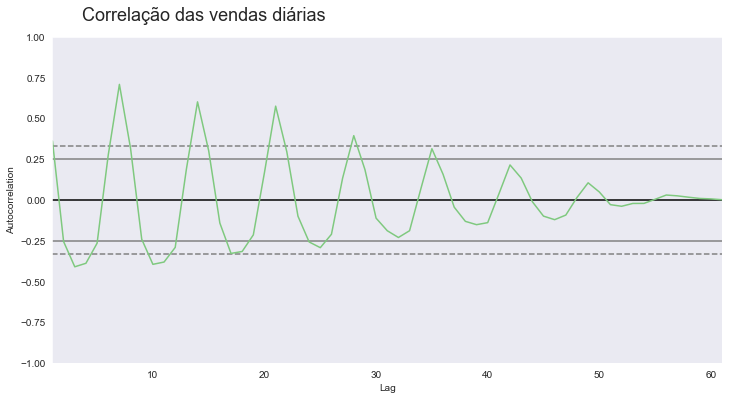

In [111]:
ax=plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize= 18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax=ax

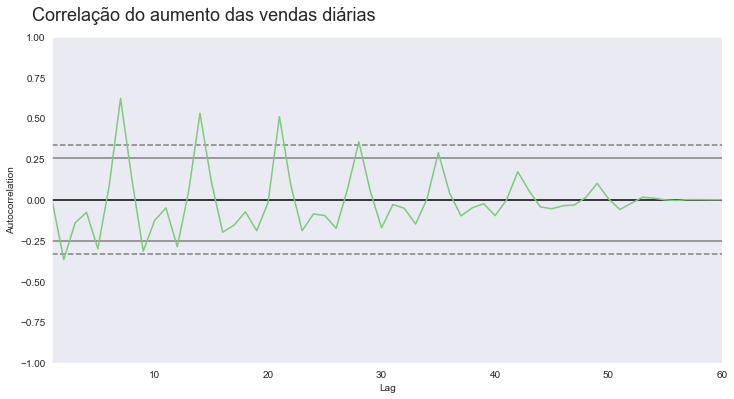

In [112]:
ax=plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize= 18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax=ax

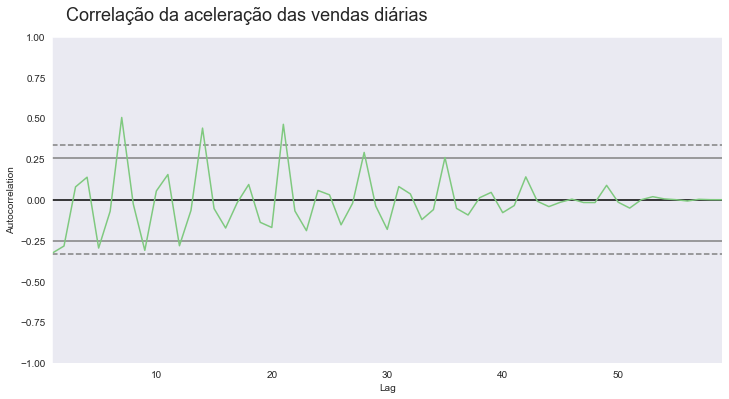

In [113]:
ax=plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize= 18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax=ax

## Cafelura - Análise de vendas


In [114]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [115]:
cafelura['mes']= pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [116]:
print("Quantidade de linhas e colunas: {}".format(cafelura.shape))
print("Quantidade de dados nulos:", cafelura.isna().sum().sum())

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


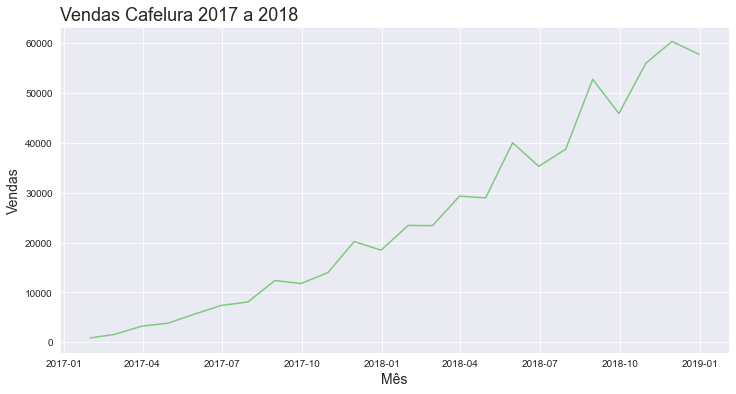

In [117]:
plotar("Vendas Cafelura 2017 a 2018", 'Mês','Vendas','mes','vendas', cafelura)


In [118]:
qtd_fds = pd.read_csv('dias_final_de_semana.csv')
qtd_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [119]:
cafelura['vendas_normalizadas'] = cafelura['vendas']/ qtd_fds['quantidade_de_dias'].values

cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


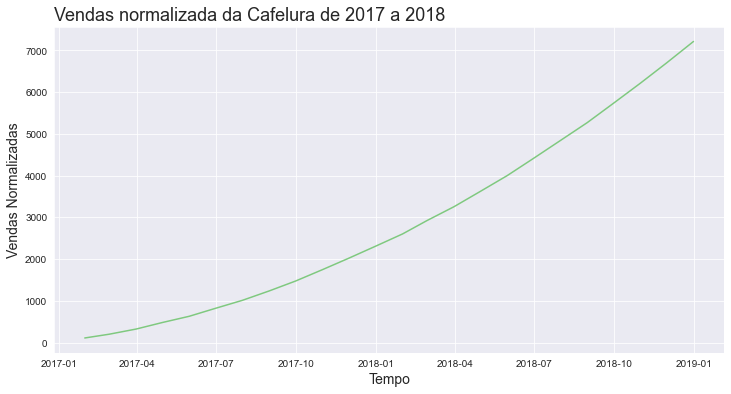

In [120]:
plotar('Vendas normalizada da Cafelura de 2017 a 2018','Tempo','Vendas Normalizadas', 'mes','vendas_normalizadas', cafelura)

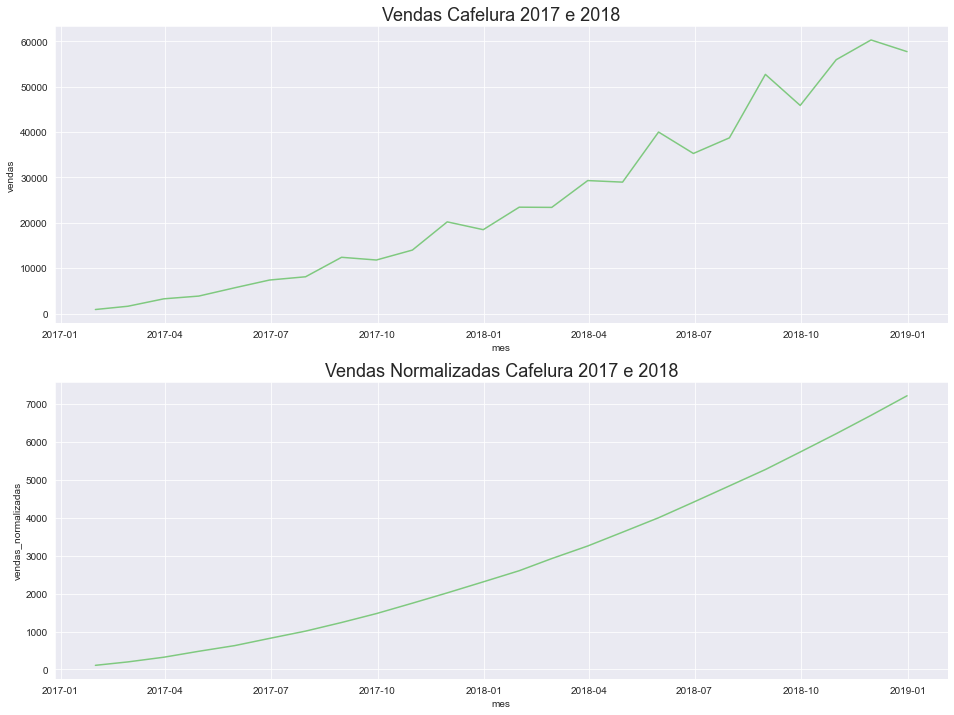

In [121]:
plt.figure(figsize=(16,12))
ax= plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize = 18)
sns.lineplot(x='mes',y='vendas', data=cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize = 18)
sns.lineplot(x='mes',y= 'vendas_normalizadas', data=cafelura)
ax=ax

# Usando Stasmodels

In [122]:
from statsmodels.tsa.seasonal import seasonal_decompose


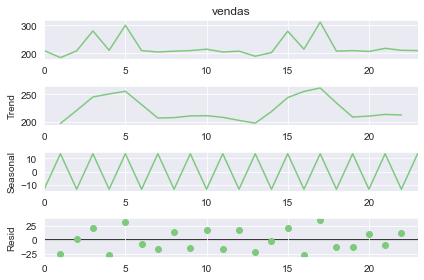

In [129]:
resultado = seasonal_decompose(chocolura['vendas'], freq = 2)
ax = resultado.plot()

In [133]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid
data = ({
    'observacao': observacao,
    'tendencia': tendencia,
    'sazonalidade':sazonalidade,
    'ruido': ruido
})

In [134]:
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,-13.386364,NaN
1,185.0,197.25,13.386364,-25.636364
2,209.0,220.75,-13.386364,1.636364
3,280.0,245.00,13.386364,21.613636
4,211.0,250.50,-13.386364,-26.113636


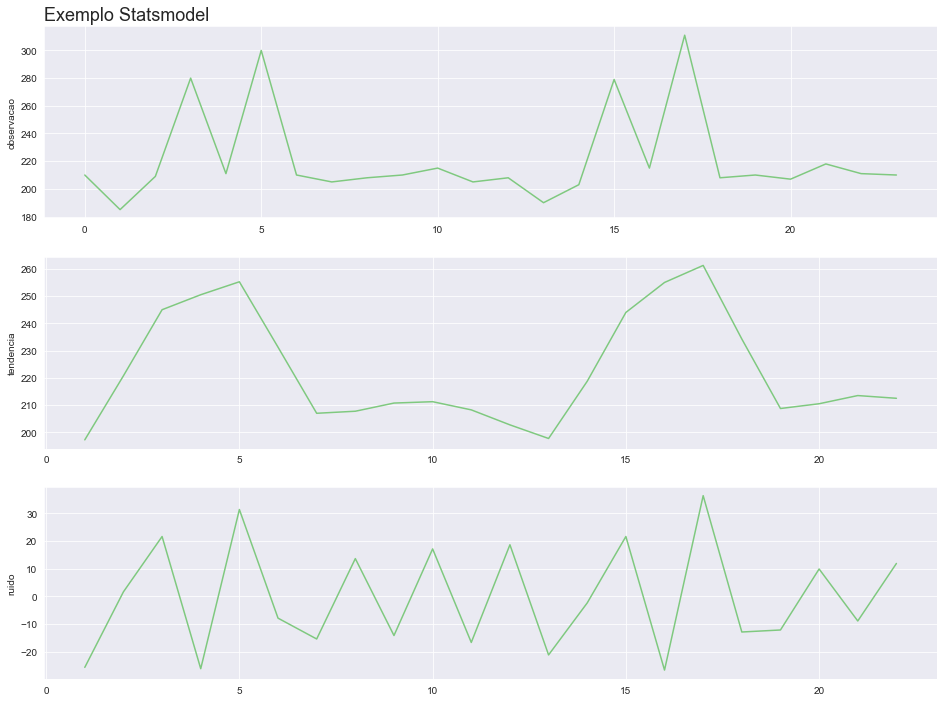

In [136]:
plot_comparação(resultado.index,'observacao', 'tendencia','sazonalidade', resultado,'Exemplo Statsmodel')

# Análise de Vendas da Alucel

In [139]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [140]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [142]:
alucel['dia']=pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [148]:
print("Quantidade de nulos: {}".format(alucel.isna().sum().sum()))

Quantidade de nulos: 0


In [151]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao']= alucel['aumento'].diff()
alucel.head()


,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


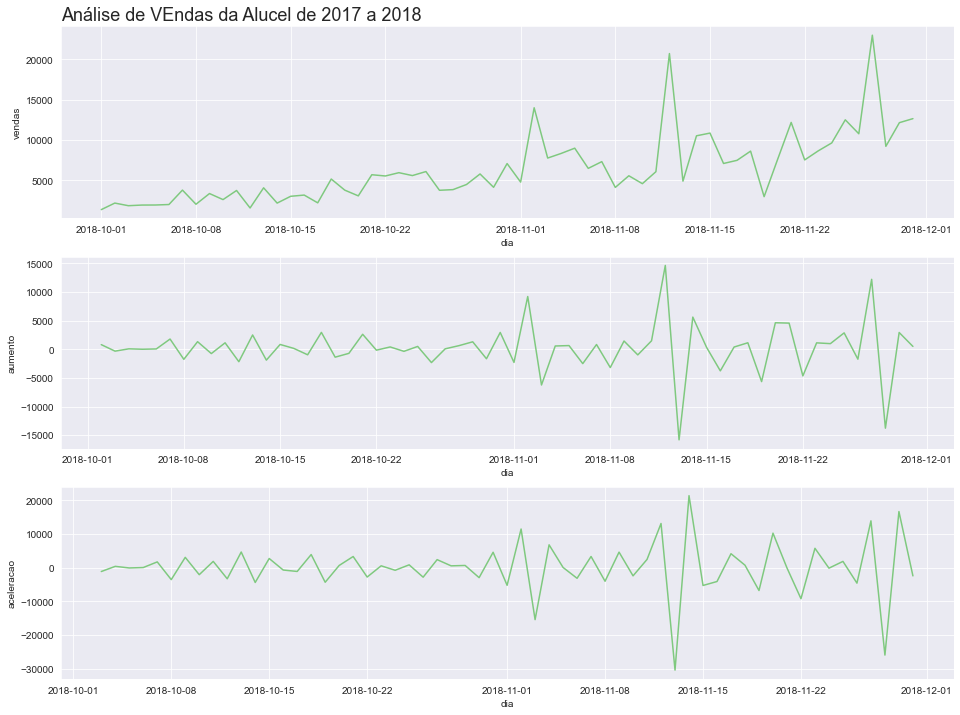

In [153]:
plot_comparação('dia','vendas','aumento','aceleracao', alucel, 'Análise de VEndas da Alucel de 2017 a 2018')

## Média Móvel

In [157]:
alucel['media_movel']=alucel['vendas'].rolling(7).mean()
alucel.head(10)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571


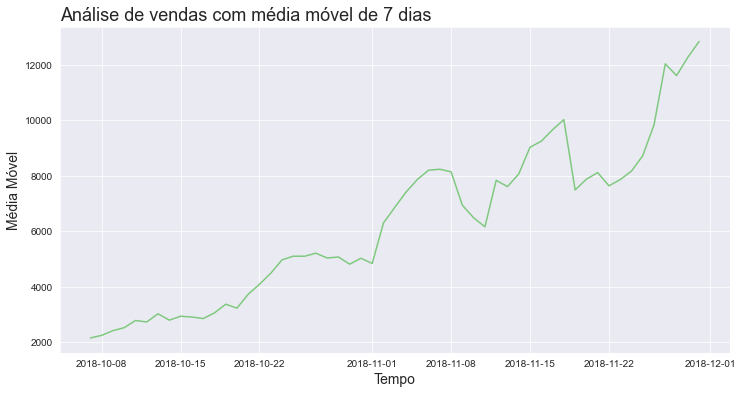

In [158]:
plotar("Análise de vendas com média móvel de 7 dias","Tempo", "Média Móvel",'dia','media_movel', alucel)

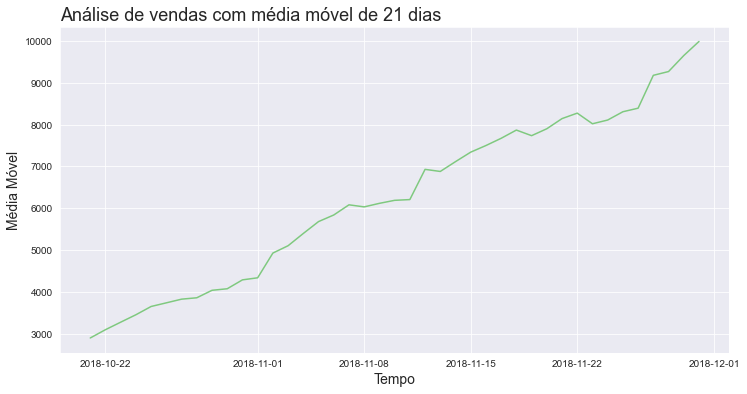

In [160]:
alucel['media_movel_21']=alucel['vendas'].rolling(21).mean()
plotar("Análise de vendas com média móvel de 21 dias","Tempo", "Média Móvel",'dia','media_movel_21', alucel)